In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns



In [2]:
# Define the paths and classes
train_dir = 'frames/train'
test_dir = 'frames/test'
CLASSES_LIST = ['Padamasana', 'Tadasana', 'Vrikshasana', 'Trikasana', 'Bhujasana']
img_size = (128, 128)  # Resize to (128x128), feel free to adjust



In [3]:
# Data Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1680 images belonging to 5 classes.
Found 450 images belonging to 5 classes.


In [4]:
print(train_generator.class_indices)


{'Bhujasana': 0, 'Padamasana': 1, 'Tadasana': 2, 'Trikasana': 3, 'Vrikshasana': 4}


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(len(CLASSES_LIST), activation='softmax')  # Output layer with softmax
])


C:\Users\Ranveer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)


In [12]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)


In [15]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping_callback]
)

Epoch 1/20


C:\Users\Ranveer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2218 - loss: 1.6977 - val_accuracy: 0.3622 - val_loss: 1.2466
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 25s 434ms/step - accuracy: 0.3941 - loss: 1.2450 - val_accuracy: 0.8244 - val_loss: 0.6663
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 462ms/step - accuracy: 0.5633 - loss: 0.9119 - val_accuracy: 0.6489 - val_loss: 0.5680
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 449ms/step - accuracy: 0.6393 - loss: 0.7870 - val_accuracy: 0.7267 - val_loss: 0.5940
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 25s 422ms/step - accuracy: 0.6691 - loss: 0.7119 - val_accuracy: 0.8244 - val_loss: 0.5022
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 440ms/step - accuracy: 0.7154 - loss: 0.6985 - val_accuracy: 0.8822 - val_loss: 0.4503
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 456ms/step - accuracy: 0.7265 - loss: 0.6195 - val_accuracy: 0.8333 - val_loss: 0.4819
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 446ms/step - accuracy: 0.7844 - loss: 0.5511 - val_accuracy: 0.8222 -

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8418 - loss: 0.3656
Test Loss: 0.4134666323661804, Test Accuracy: 0.851111114025116


In [17]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [18]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)


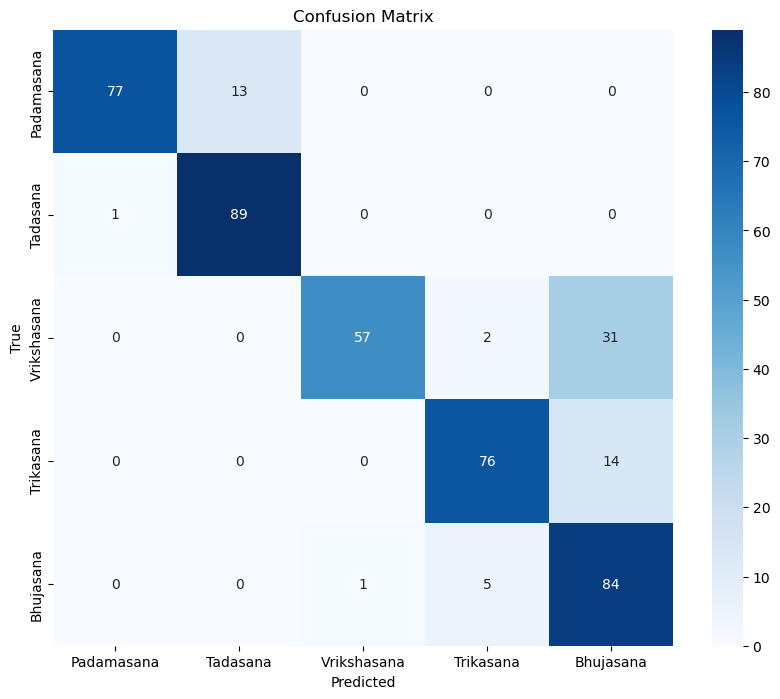

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=CLASSES_LIST, yticklabels=CLASSES_LIST)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [20]:
print(classification_report(y_true, y_pred_classes, target_names=CLASSES_LIST))


              precision    recall  f1-score   support

  Padamasana       0.99      0.86      0.92        90
    Tadasana       0.87      0.99      0.93        90
 Vrikshasana       0.98      0.63      0.77        90
   Trikasana       0.92      0.84      0.88        90
   Bhujasana       0.65      0.93      0.77        90

    accuracy                           0.85       450
   macro avg       0.88      0.85      0.85       450
weighted avg       0.88      0.85      0.85       450



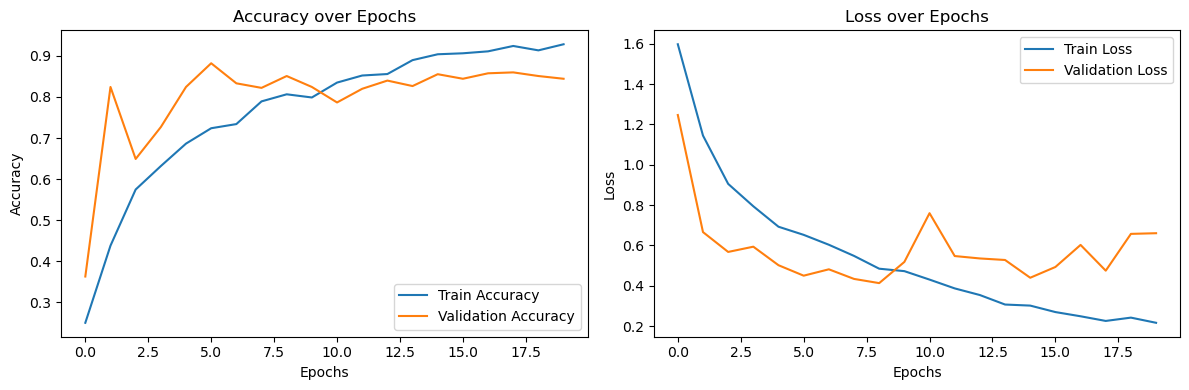

In [21]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
model.save('yoga_pose_model.h5')
